In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

import scipy.spatial
import scipy.linalg
import scipy as sp

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.sandbox.stats.multicomp as smm
import statsmodels.tsa.stattools as tsa
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import seaborn as sns

import re
from collections import defaultdict

import sys
sys.path.append('..')

from arcticsea import icesplines as isp

In [3]:
nyrs = list(range(1850, 2014))

In [4]:
# Read spatial series for all seasons
Xdjf = pd.read_csv('../data/djf_spatial_series.csv', delimiter=',')
#Xmam = pd.read_csv('../data/mam_spatial_series.csv', delimiter=',')
#Xjja = pd.read_csv('../data/jja_spatial_series.csv', delimiter=',')
#Xson = pd.read_csv('../data/son_spatial_series.csv', delimiter=',')

In [5]:
Xdjf.head()

(50.125, 0.125)  (50.125, 0.375)  (50.125, 0.625)  (50.125, 0.875)  \
0              0.0              0.0              0.0              0.0   
1              0.0              0.0              0.0              0.0   
2              0.0              0.0              0.0              0.0   
3              0.0              0.0              0.0              0.0   
4              0.0              0.0              0.0              0.0   

   (50.125, 1.125)  (50.125, 1.375)  (50.125, 92.875)  (50.125, 141.125)  \
0              0.0              0.0               0.0           2.201030   
1              0.0              0.0               0.0          75.222229   
2              0.0              0.0               0.0          68.222221   
3              0.0              0.0               0.0          64.555565   
4              0.0              0.0               0.0          68.222221   

   (50.125, 141.375)  (50.125, 141.625)        ...          (89.875, 357.625)  \
0           2.103823           2.021528        ...                  99.492981   
1          75.222229          74.888893        ...                  99.760002   
2          68.222221          70.111107        ...                  99.778893   
3          64.555565          63.666676        ...                  99.641113   
4          68.222221          67.888893        ...                  99.717773   

   (89.875, 357.875)  (89.875, 358.125)  (89.875, 358.375)  (89.875, 358.625)  \
0          99.492973          99.492958          99.492943          99.492943   
1          99.760002          99.760002          99.760002          99.760002   
2          99.778893          99.778893          99.778893          99.778893   
3          99.641113          99.641113          99.641113          99.641113   
4          99.717773          99.717773          99.717773          99.717773   

   (89.875, 358.875)  (89.875, 359.125)  (89.875, 359.375)  (89.875, 359.625)  \
0          99.492928          99.492920          99.492912          99.492897   
1          99.760002          99.760002          99.760002          99.760002   
2          99.778893          99.778893          99.778893          99.778893   
3          99.641113          99.641113          99.641113          99.641113   
4          99.717773          99.717773          99.717773          99.717773   

   (89.875, 359.875)  
0          99.492897  
1          99.760002  
2          99.778893  
3          99.641113  
4          99.717773  

[5 rows x 134575 columns]

In [6]:
Xdjf.shape

(164, 134575)

In [7]:
# Create dictionary with lats a keys to group together
coords = Xdjf.columns.values
latlons = defaultdict(list)

for ll in coords:
    x, y = re.findall(r'([0-9.]+)[,]?', ll[1:-1])
    latlons[float(x)].append(float(y))

In [8]:
latlons.keys()

dict_keys([50.125, 50.375, 50.625, 50.875, 51.125, 51.375, 51.625, 51.875, 52.125, 52.375, 52.625, 52.875, 53.125, 53.375, 53.625, 53.875, 54.125, 54.375, 54.625, 54.875, 55.125, 55.375, 55.625, 55.875, 56.125, 56.375, 56.625, 56.875, 57.125, 57.375, 57.625, 57.875, 58.125, 58.375, 58.625, 58.875, 59.125, 59.375, 59.625, 59.875, 60.125, 60.375, 60.625, 60.875, 61.125, 61.375, 61.625, 61.875, 62.125, 62.375, 62.625, 62.875, 63.125, 63.375, 63.625, 63.875, 64.125, 64.375, 64.625, 64.875, 65.125, 65.375, 65.625, 65.875, 66.125, 66.375, 66.625, 66.875, 67.125, 67.375, 67.625, 67.875, 68.125, 68.375, 68.625, 68.875, 69.125, 69.375, 69.625, 69.875, 70.125, 70.375, 70.625, 70.875, 71.125, 71.375, 71.625, 71.875, 72.125, 72.375, 72.625, 72.875, 73.125, 73.375, 73.625, 73.875, 74.125, 74.375, 74.625, 74.875, 75.125, 75.375, 75.625, 75.875, 76.125, 76.375, 76.625, 76.875, 77.125, 77.375, 77.625, 77.875, 78.125, 78.375, 78.625, 78.875, 79.125, 79.375, 79.625, 79.875, 80.125, 80.375, 80.625, 80.87

In [9]:
len(latlons[89.875])

1440

In [10]:
djf_lat_splines = isp.SeaiceSplines(Xdjf.iloc[:,100000].values)

In [11]:
djf_lat_splines.fit(mars=True)

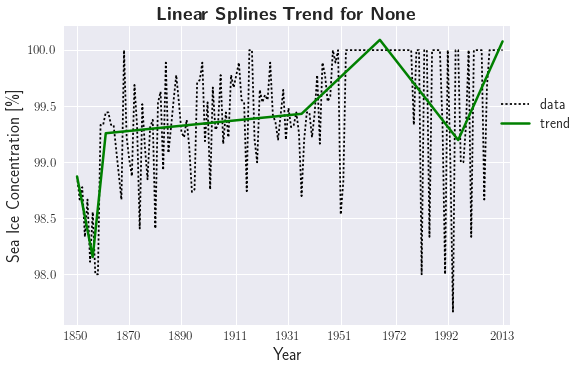

In [12]:
djf_lat_splines.plot()

In [13]:
x = list(latlons.keys())

In [14]:
len(x)

160

In [15]:
lat1 = x[32]
lat2 = x[64]
lat3 = x[70]
lat4 = x[96]
lat5 = x[128]
lat6 = x[159]

In [16]:
nlons1 = len(latlons[lat1]) - 1
nlons2 = len(latlons[lat2]) - 1
nlons3 = len(latlons[lat3]) - 1
nlons4 = len(latlons[lat4]) - 1
nlons5 = len(latlons[lat5]) - 1
nlons6 = len(latlons[lat6]) - 1

step1 = nlons1 // 4
step2 = nlons2 // 4
step3 = nlons3 // 4
step4 = nlons4 // 4
step5 = nlons5 // 4
step6 = nlons6 // 4

lons1 = [[latlons[lat1][i], latlons[lat1][i+1], latlons[lat1][i+2]] for i in range(0, nlons1, step1)]
lons2 = [[latlons[lat2][i], latlons[lat2][i+1], latlons[lat2][i+2]] for i in range(0, nlons2-1, step2)]
lons3 = [[latlons[lat3][i], latlons[lat3][i+1], latlons[lat3][i+2]] for i in range(0, nlons3-1, step3)]
lons4 = [[latlons[lat4][i], latlons[lat4][i+1], latlons[lat4][i+2]] for i in range(0, nlons4, step4)]
lons5 = [[latlons[lat5][i], latlons[lat5][i+1], latlons[lat5][i+2]] for i in range(0, nlons5-1, step5)]
lons6 = [[latlons[lat6][i], latlons[lat6][i+1], latlons[lat6][i+2]] for i in range(0, nlons6, step6)]

lons5 += [[latlons[lat5][-1], latlons[lat5][-2], latlons[lat5][-3]]]

lons1 = [lon for neighbor in lons1 for lon in neighbor]
lons2 = [lon for neighbor in lons2 for lon in neighbor]
lons3 = [lon for neighbor in lons3 for lon in neighbor]
lons4 = [lon for neighbor in lons4 for lon in neighbor]
lons5 = [lon for neighbor in lons5 for lon in neighbor]
lons6 = [lon for neighbor in lons6 for lon in neighbor]

latlon1 = [str((lat1, l)) for l in lons1]
latlon2 = [str((lat2, l)) for l in lons2]
latlon3 = [str((lat3, l)) for l in lons3]
latlon4 = [str((lat4, l)) for l in lons4]
latlon5 = [str((lat5, l)) for l in lons5]
latlon6 = [str((lat6, l)) for l in lons6]

In [17]:
len(latlon1)

12

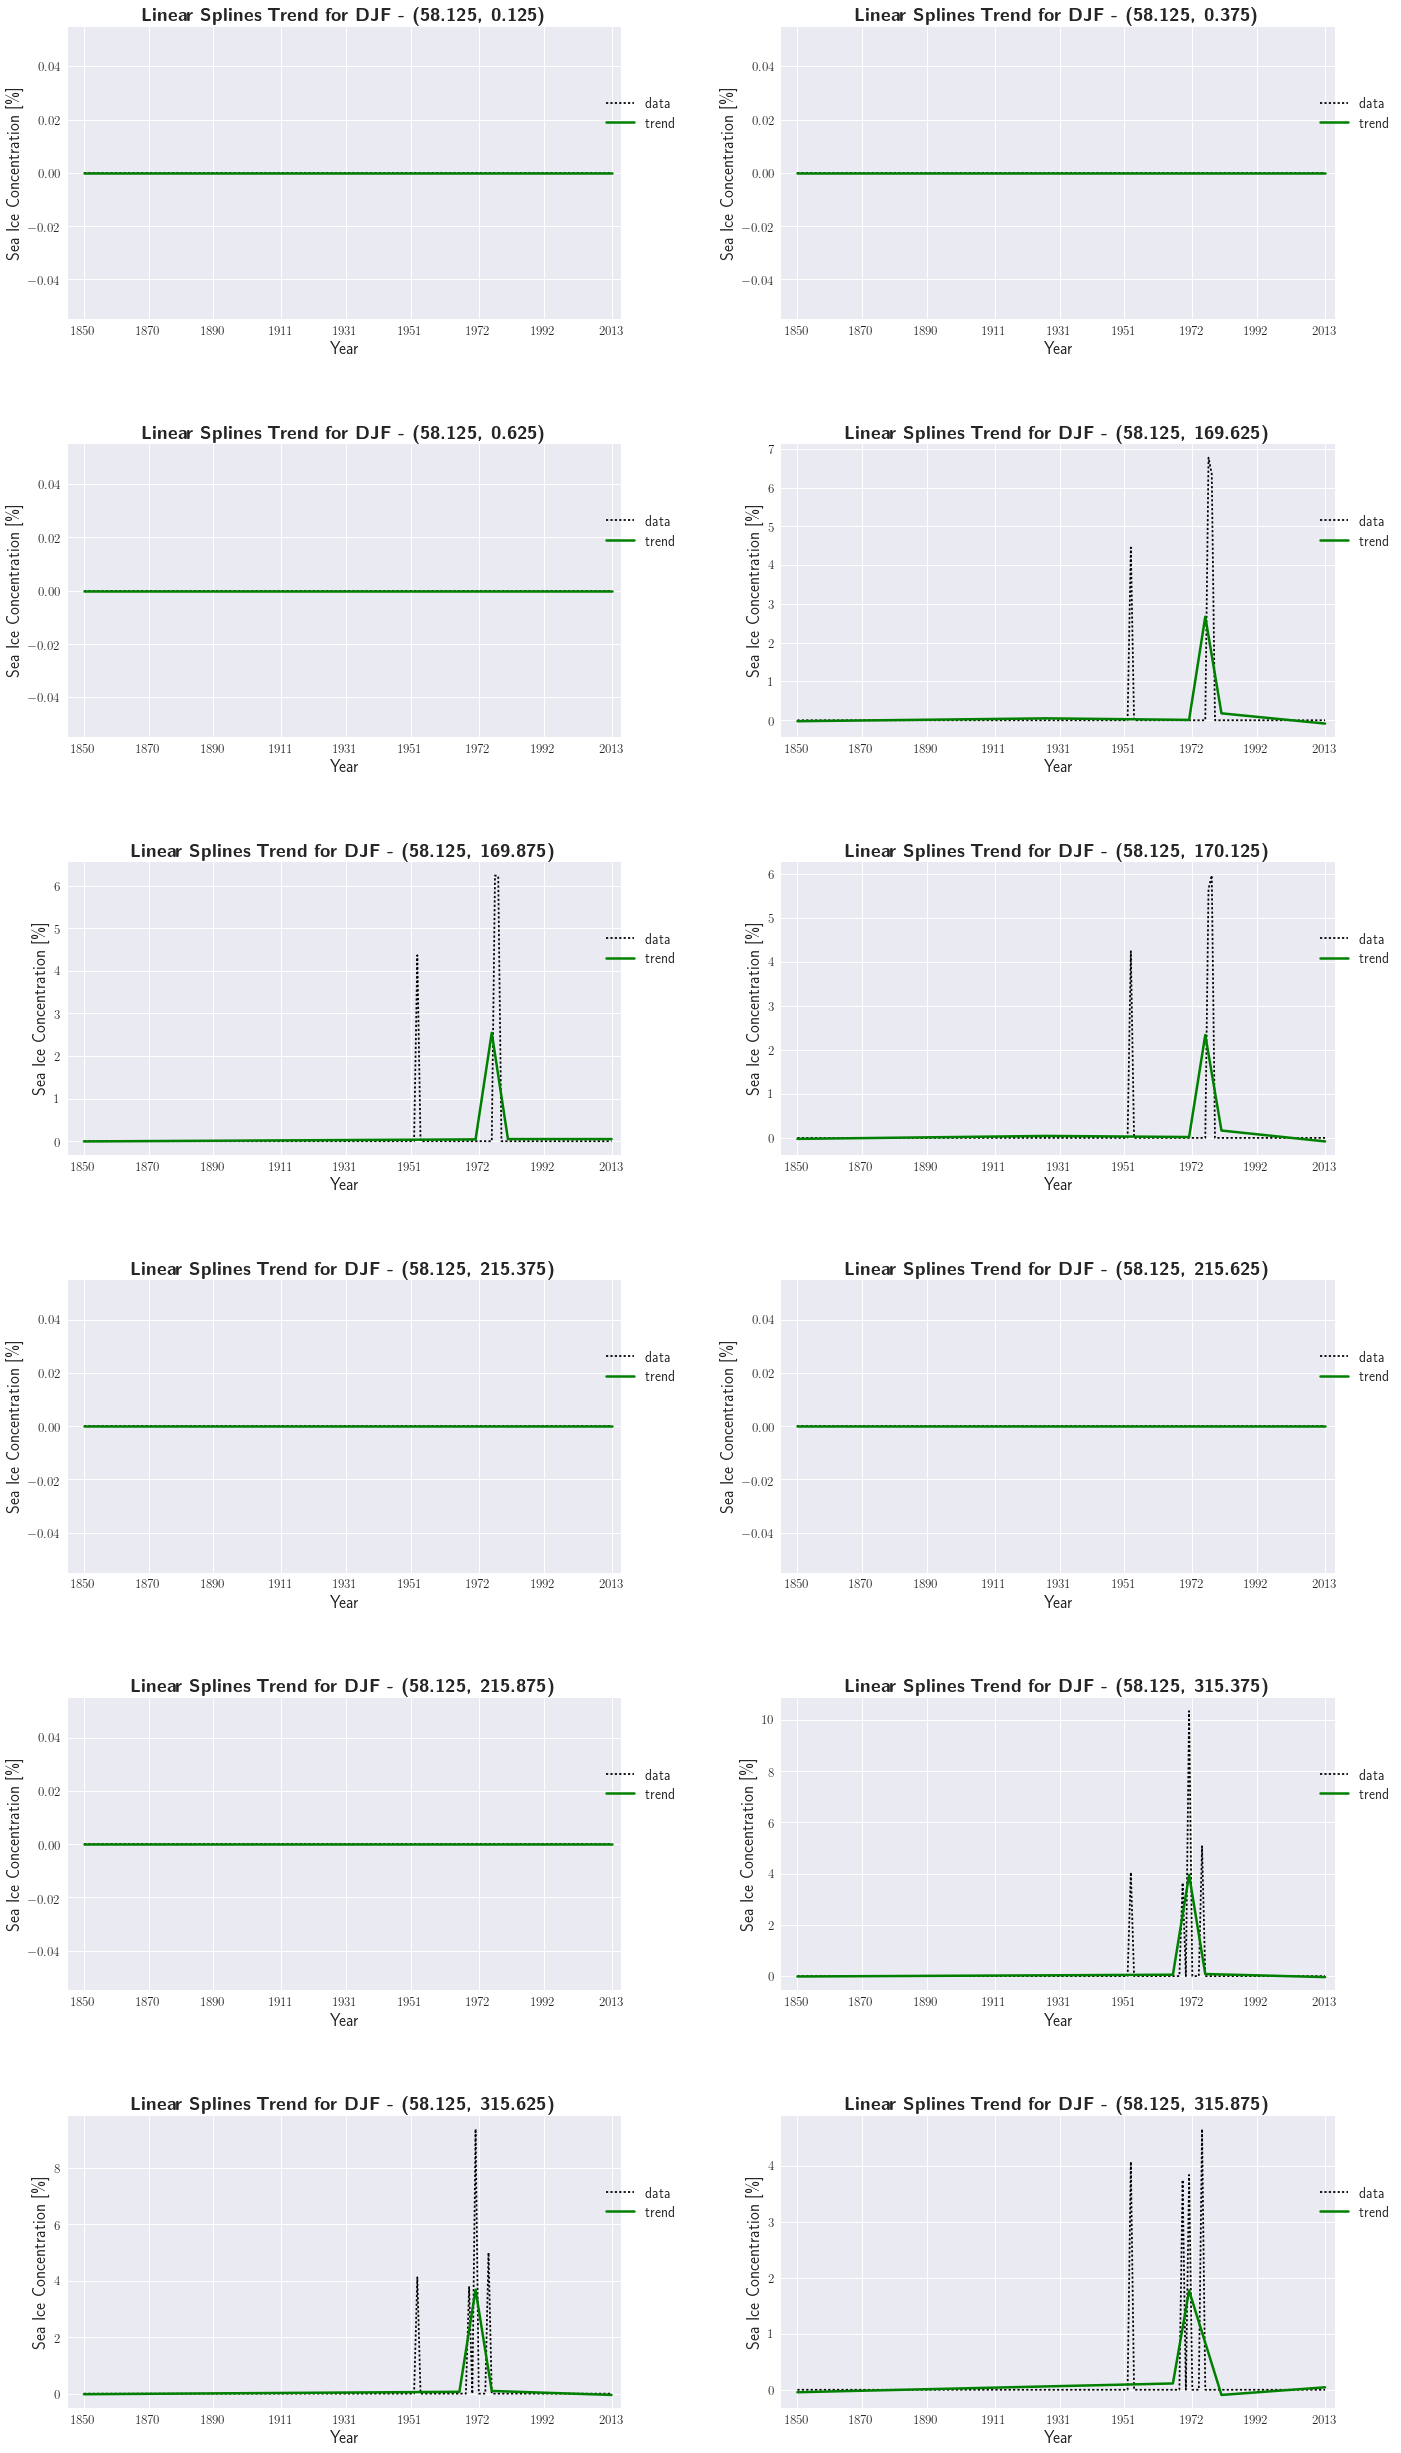

In [18]:
f, axs = plt.subplots(6, 2, figsize=(20, 35))
axs = np.array(axs)
for i, ax in enumerate(axs.reshape(-1)):
    ll = latlon1[i]
    title = 'DJF - {}'.format(ll)
    djf_ll_splines = isp.SeaiceSplines(Xdjf[ll].values)
    djf_ll_splines.fit(mars=True)
    djf_ll_splines.plot(season=title, ax=ax)
    
plt.subplots_adjust(wspace=2, hspace=5)
plt.tight_layout()

In [19]:
len(latlon2)

15

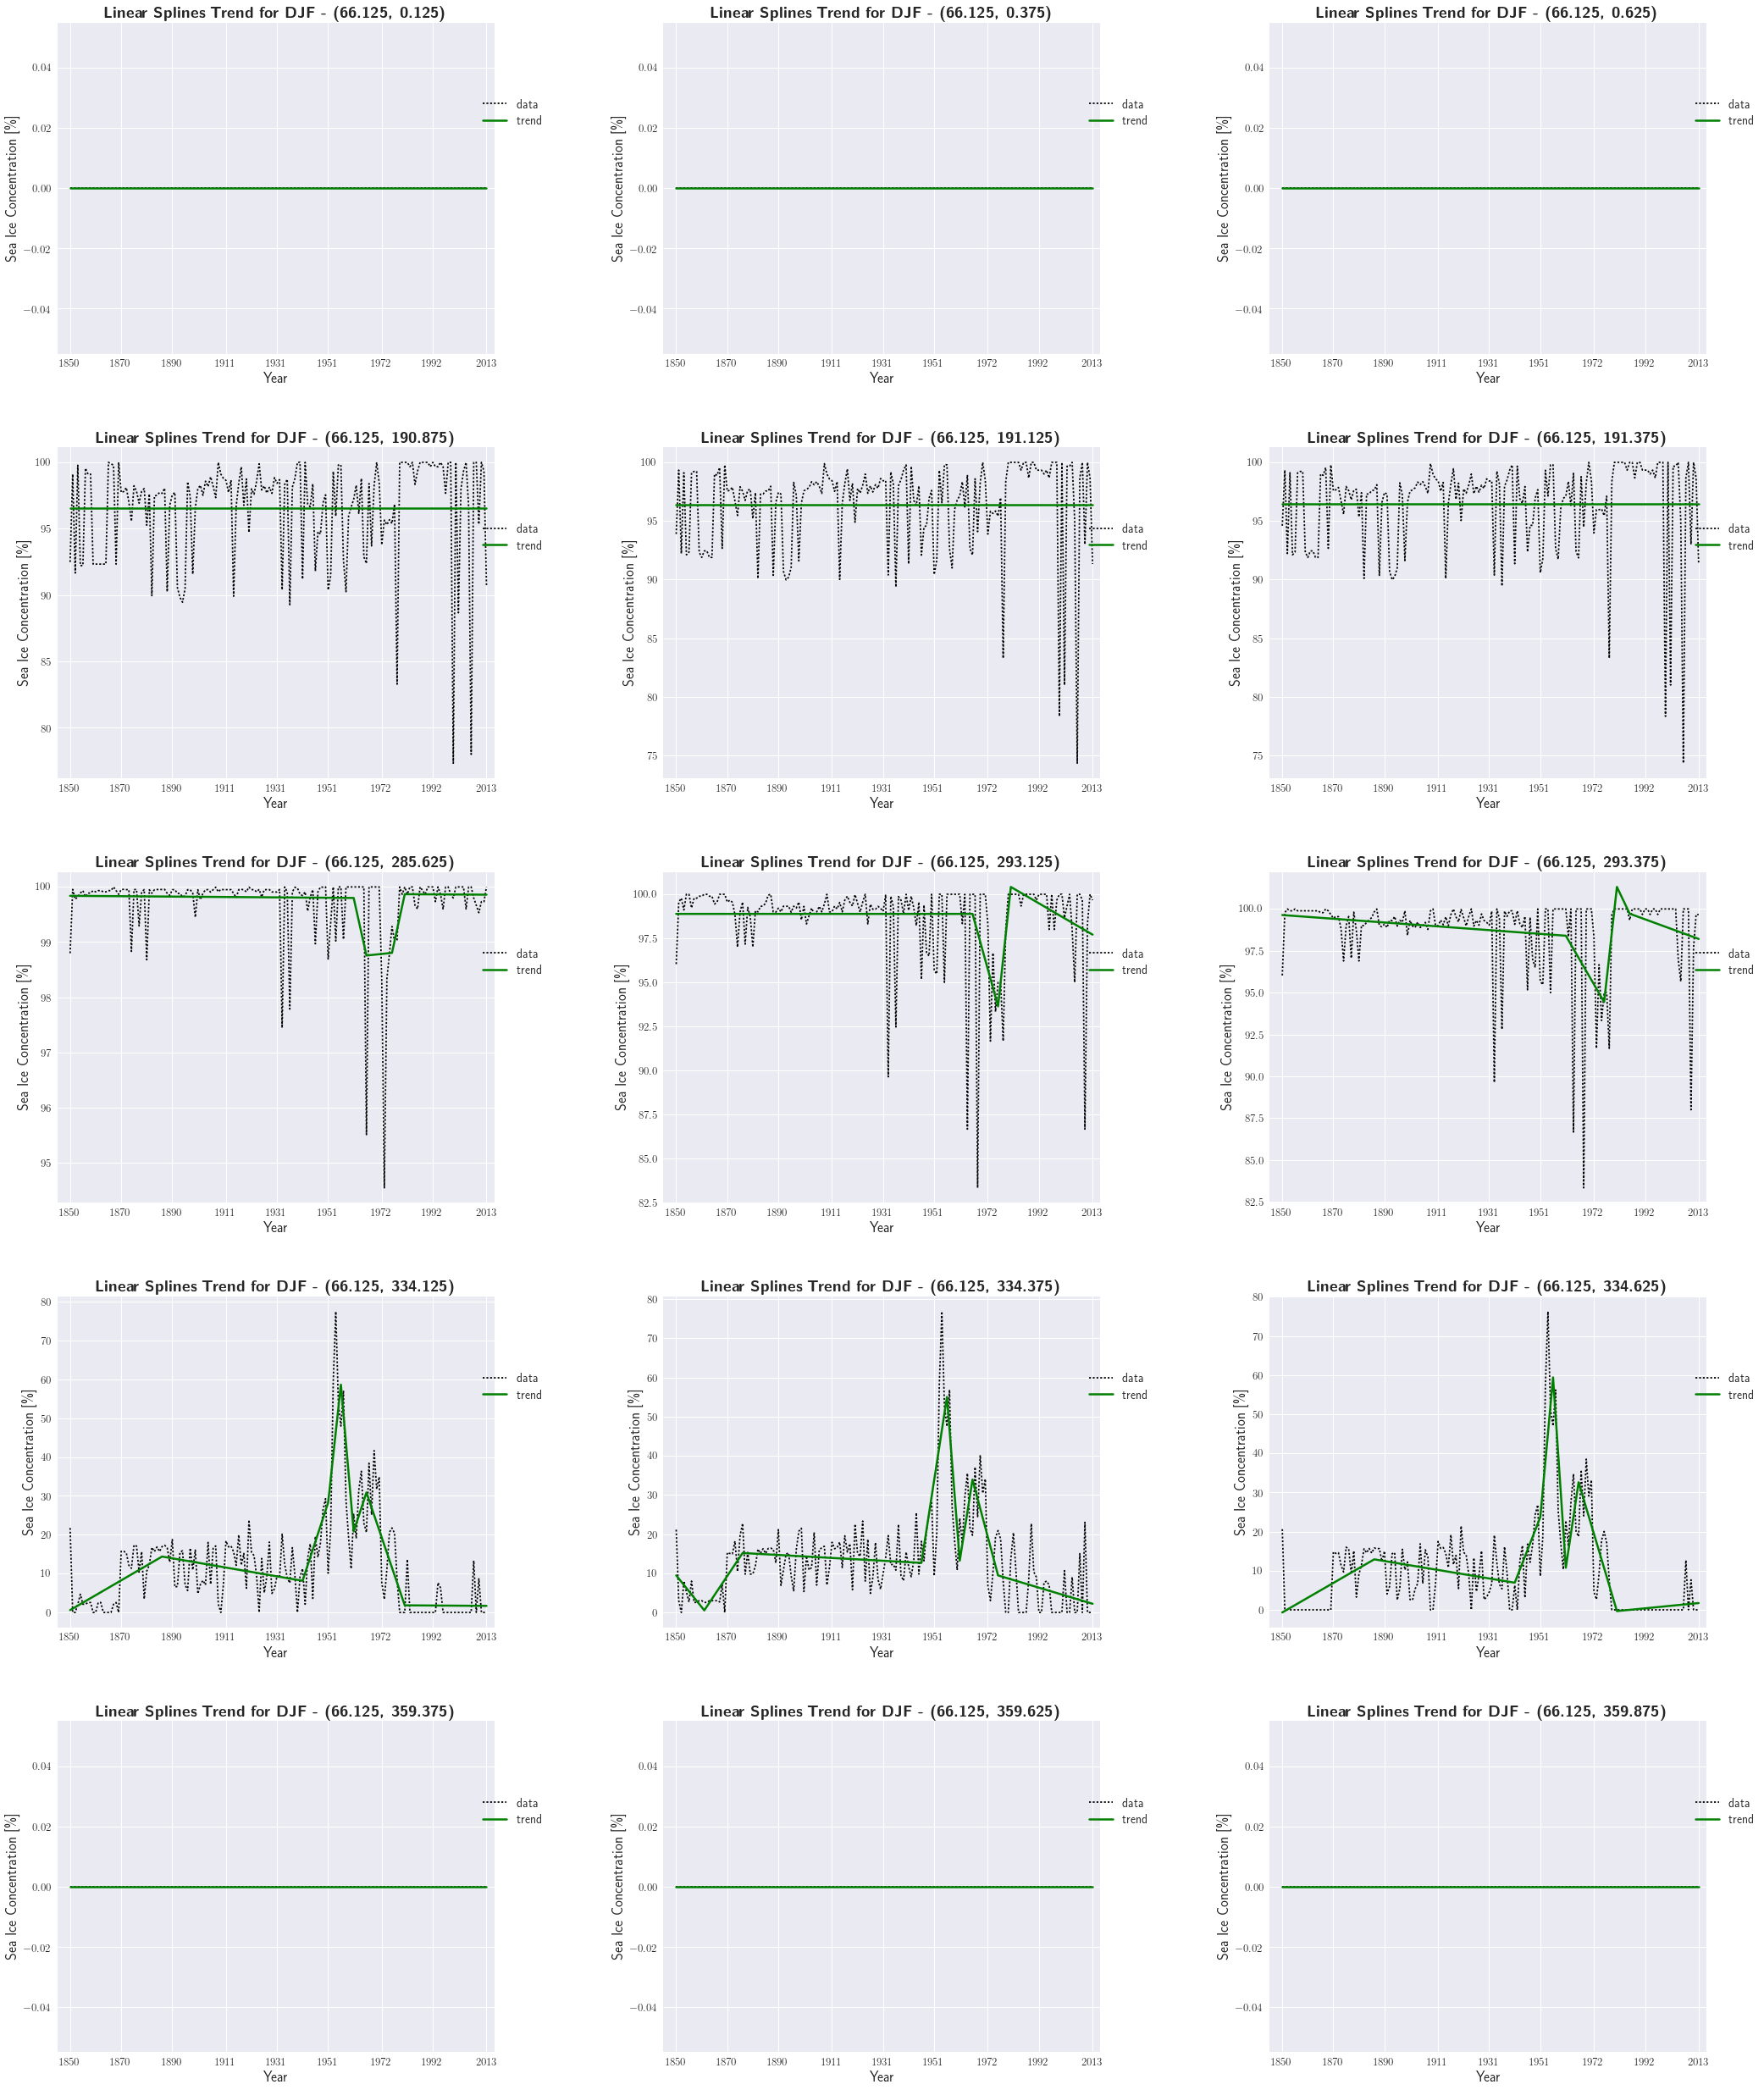

In [20]:
f, axs = plt.subplots(5, 3, figsize=(30, 35))
axs = np.array(axs)
for i, ax in enumerate(axs.reshape(-1)):
    ll = latlon2[i]
    title = 'DJF - {}'.format(ll)
    djf_ll_splines = isp.SeaiceSplines(Xdjf[ll].values)
    djf_ll_splines.fit(mars=True)
    djf_ll_splines.plot(season=title, ax=ax)
    
plt.subplots_adjust(wspace=2, hspace=5)
plt.tight_layout()

In [21]:
len(latlon3)

12

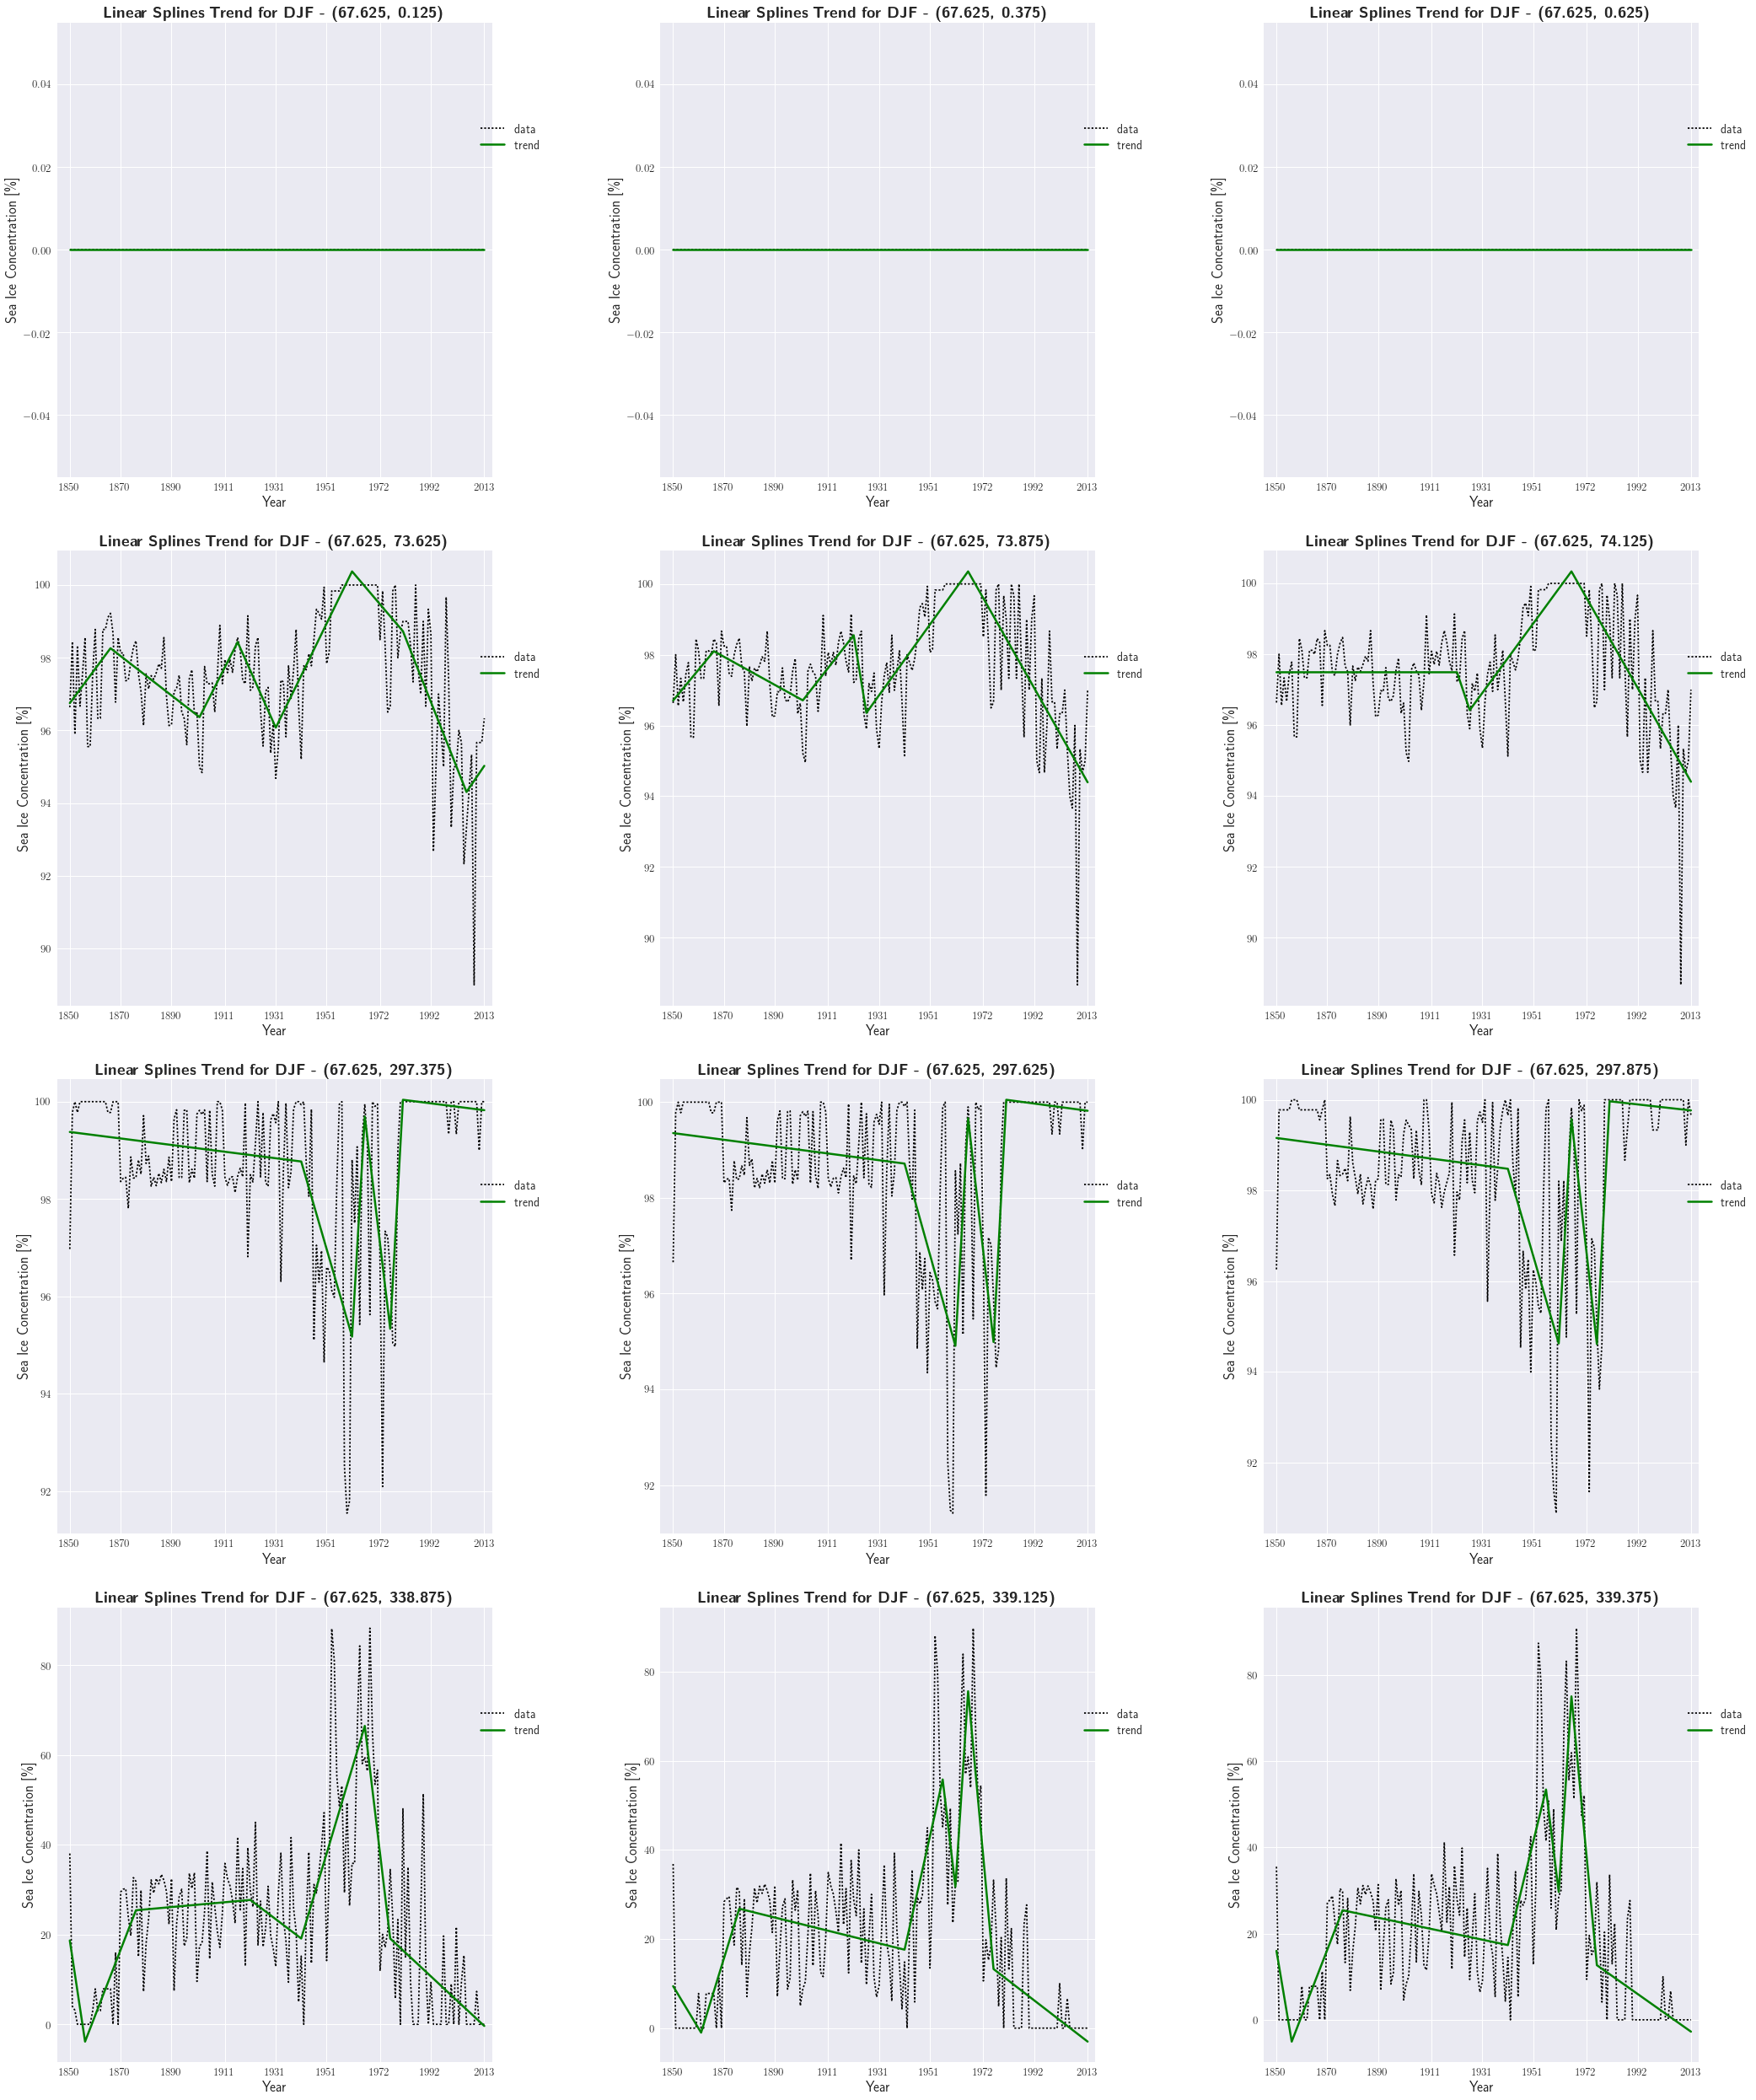

In [22]:
f, axs = plt.subplots(4, 3, figsize=(30, 35))
axs = np.array(axs)
for i, ax in enumerate(axs.reshape(-1)):
    ll = latlon3[i]
    title = 'DJF - {}'.format(ll)
    djf_ll_splines = isp.SeaiceSplines(Xdjf[ll].values)
    djf_ll_splines.fit(mars=True)
    djf_ll_splines.plot(season=title, ax=ax)
    
plt.subplots_adjust(wspace=2, hspace=5)
plt.tight_layout()

In [23]:
len(latlon4)

15

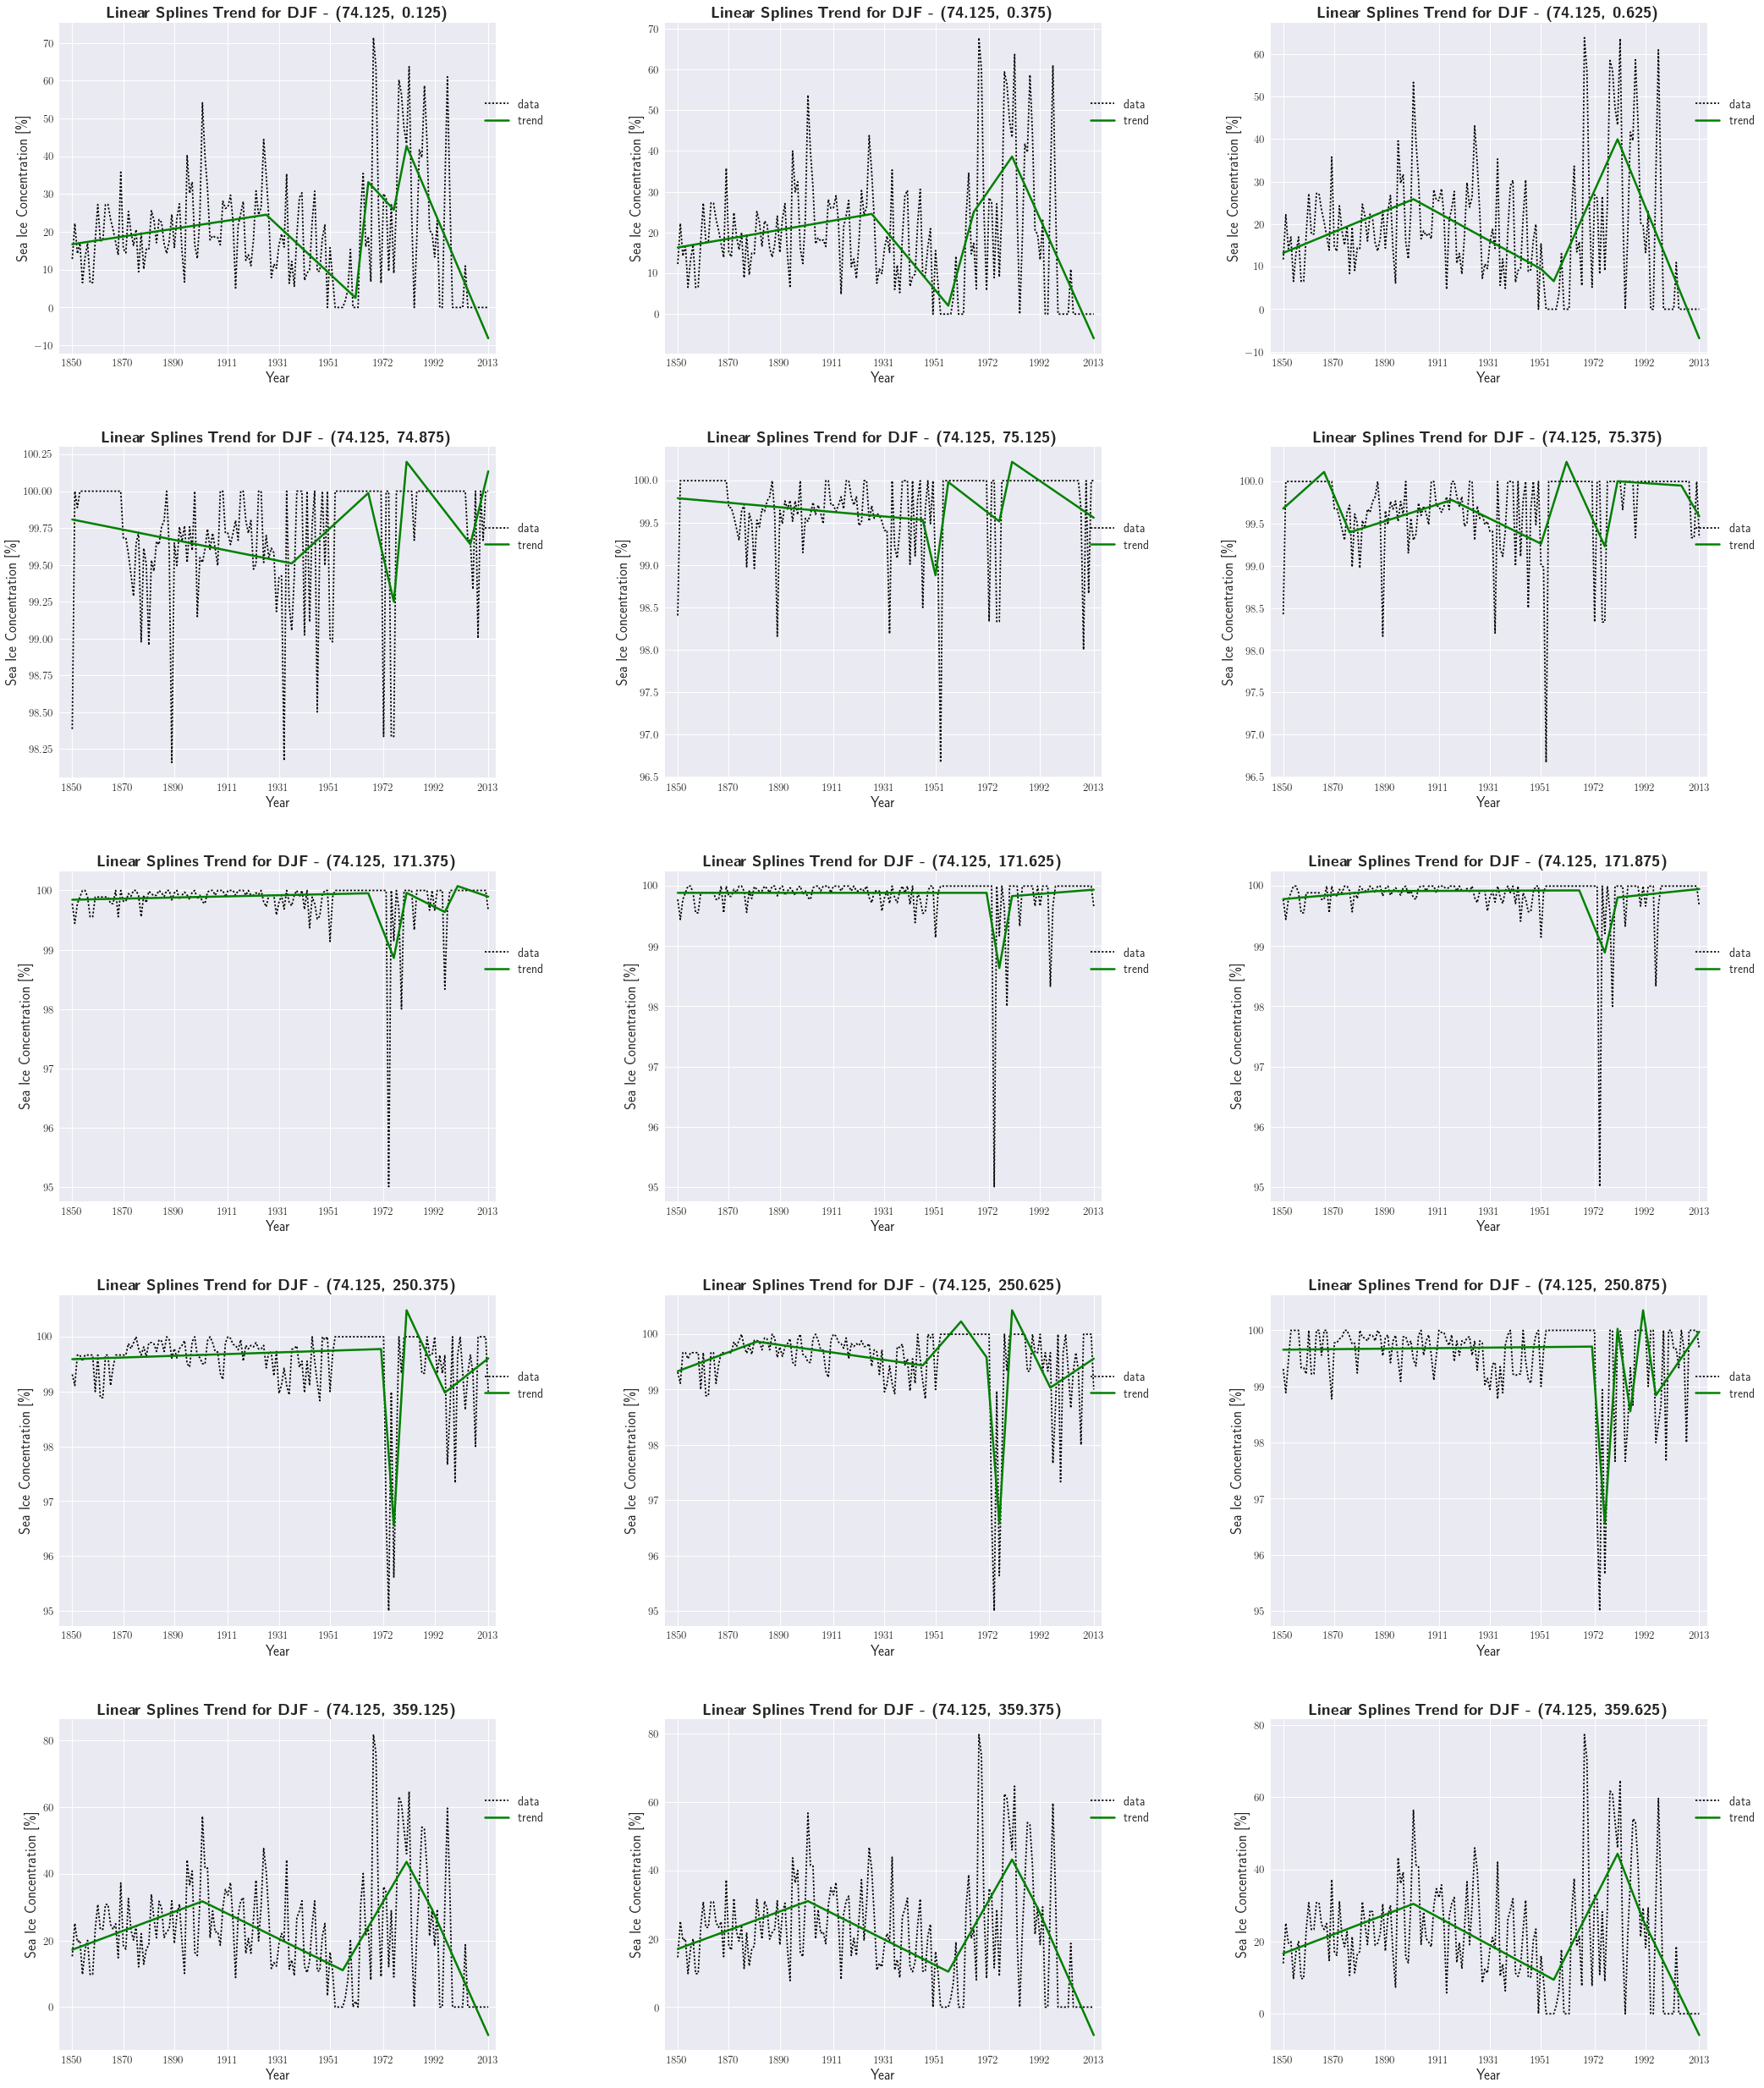

In [24]:
f, axs = plt.subplots(5, 3, figsize=(30, 35))
axs = np.array(axs)
for i, ax in enumerate(axs.reshape(-1)):
    ll = latlon4[i]
    title = 'DJF - {}'.format(ll)
    djf_ll_splines = isp.SeaiceSplines(Xdjf[ll].values)
    djf_ll_splines.fit(mars=True)
    djf_ll_splines.plot(season=title, ax=ax)
    
plt.subplots_adjust(wspace=2, hspace=5)
plt.tight_layout()

In [25]:
len(latlon5)

15

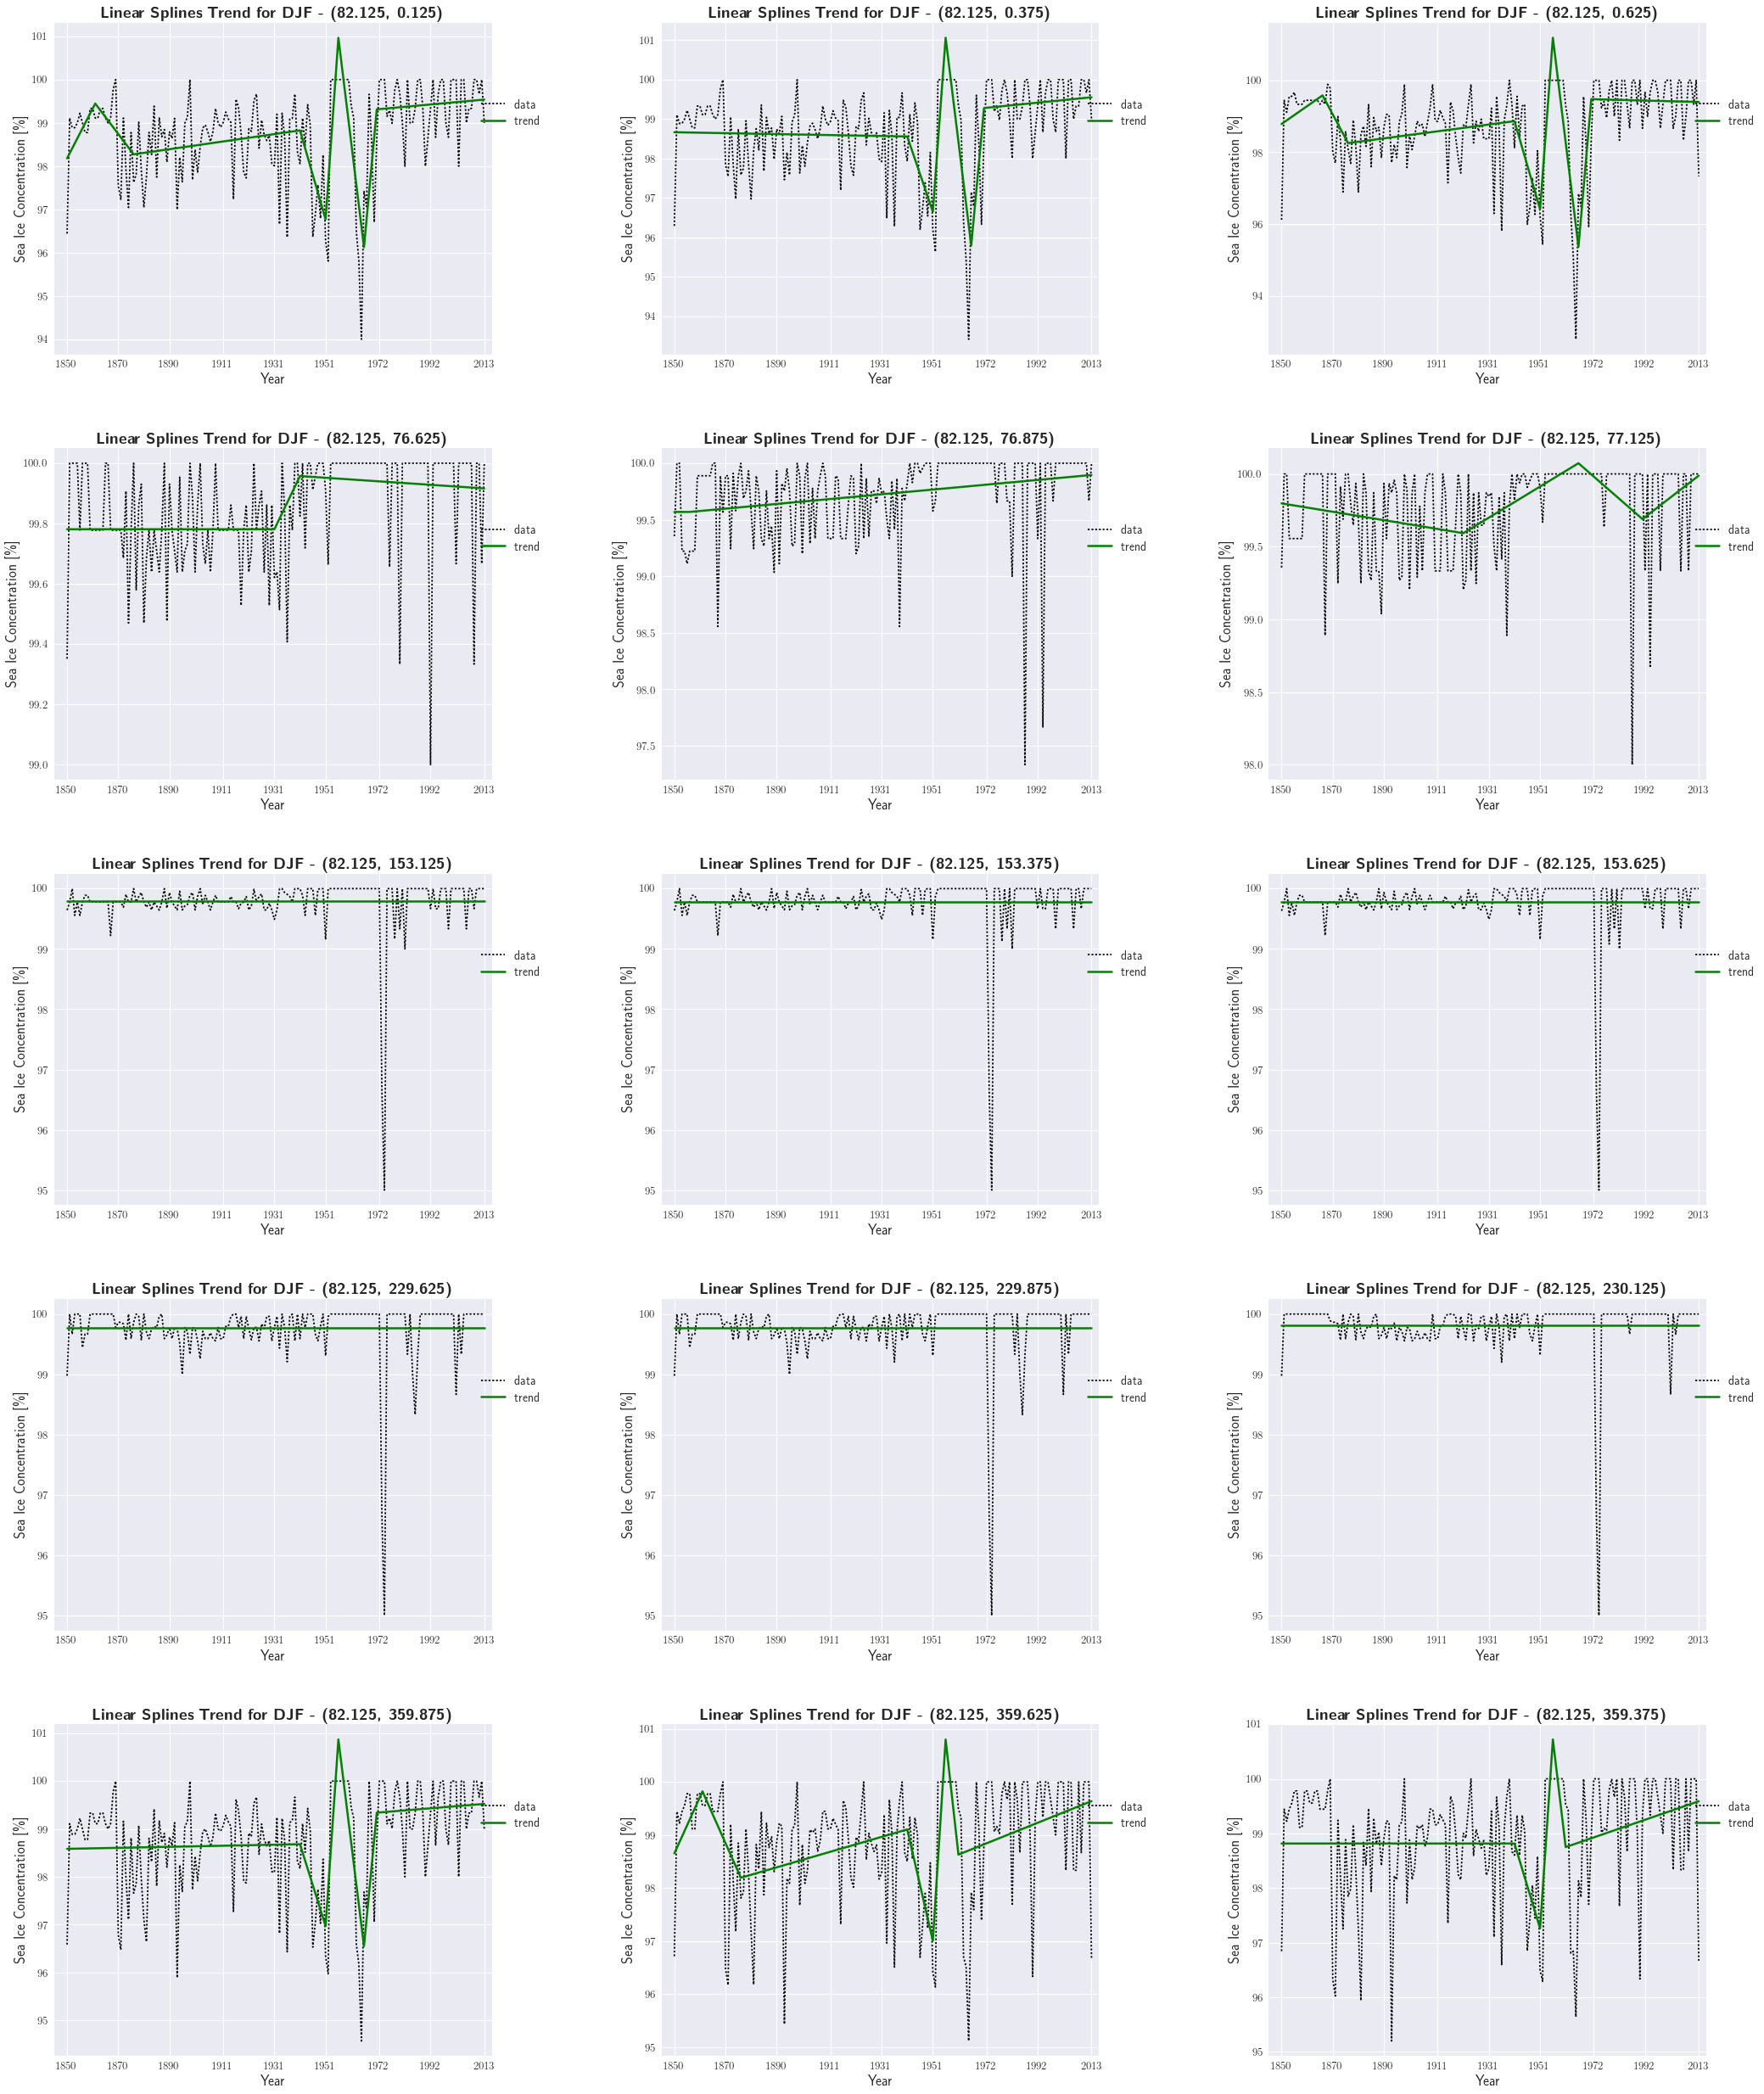

In [26]:
f, axs = plt.subplots(5, 3, figsize=(30, 35))
axs = np.array(axs)
for i, ax in enumerate(axs.reshape(-1)):
    ll = latlon5[i]
    title = 'DJF - {}'.format(ll)
    djf_ll_splines = isp.SeaiceSplines(Xdjf[ll].values)
    djf_ll_splines.fit(mars=True)
    djf_ll_splines.plot(season=title, ax=ax)
    
plt.subplots_adjust(wspace=2, hspace=5)
plt.tight_layout()

In [27]:
len(latlon6)

15

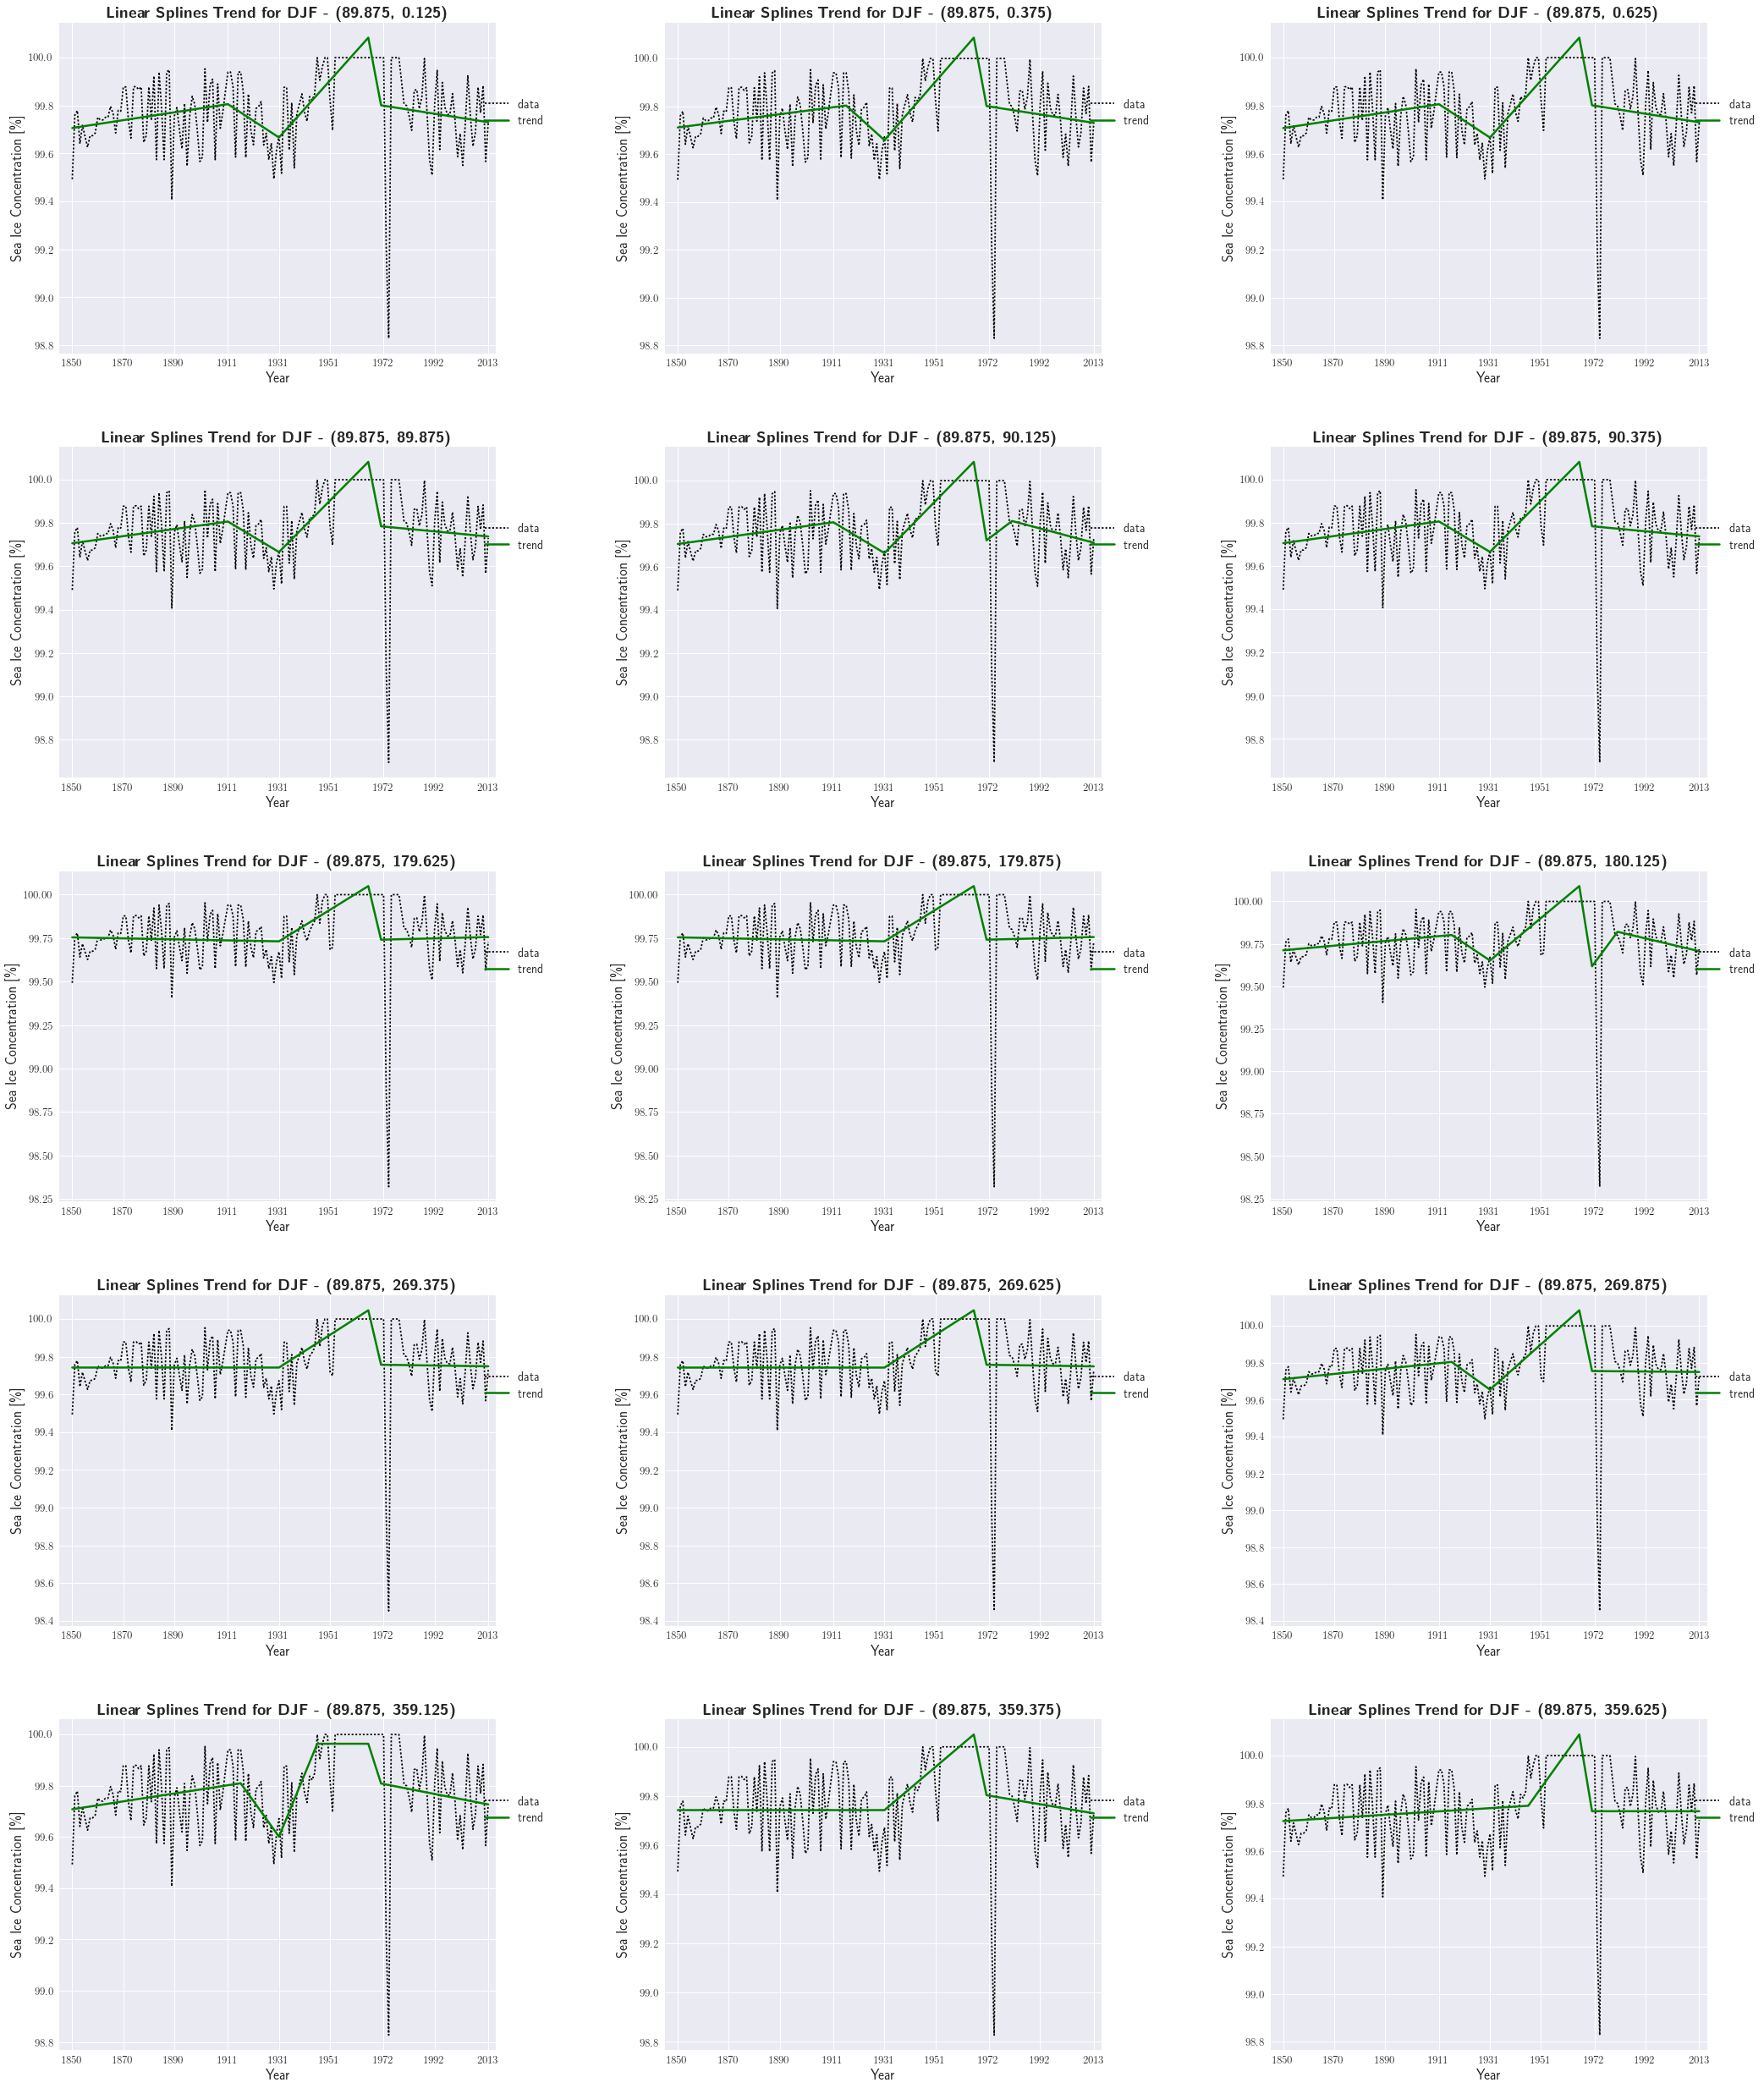

In [28]:
f, axs = plt.subplots(5, 3, figsize=(30, 35))
axs = np.array(axs)
for i, ax in enumerate(axs.reshape(-1)):
    ll = latlon6[i]
    title = 'DJF - {}'.format(ll)
    djf_ll_splines = isp.SeaiceSplines(Xdjf[ll].values)
    djf_ll_splines.fit(mars=True)
    djf_ll_splines.plot(season=title, ax=ax)
    
plt.subplots_adjust(wspace=2, hspace=5)
plt.tight_layout()